# Primer Examen 15%

In [139]:
import matplotlib.pyplot as plt
import math as m
import cmath as cm
import numpy as np
import numpy as np
from scipy import integrate
from scipy import optimize
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [5]:
import pandas as pd
import numpy as np




In [8]:
df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz') # Aqui tenemos nuestro Dataframe.
df  # Dataframe original.

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [12]:
df['solution']   # Tenemos la columna solutions.
# Debemos de sacar el valor maximo del valor absoluto de nuestro dataframe, para esto ahcemos lo siguiente.


0             [1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]
1                           [1, 2, 2, -3, -3, -3, 4]
2         [1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]
3           [1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]
4             [1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]
                             ...                    
390069             [8, -9, -9, 11, 25, -29, -29, 32]
390070              [5, 5, 5, -17, -27, -27, 28, 28]
390071          [14, -15, -16, 17, -30, 31, 31, -32]
390072          [11, -13, -15, 19, 23, -26, -30, 31]
390073          [16, -17, -17, 19, 20, -22, -22, 23]
Name: solution, Length: 390074, dtype: object

In [14]:
df['smax']=df['solution'].apply(lambda l: max(map(abs,l)))  # Aqui tenemos nuestra columna maxima.
df  # Nuestro Dataframe.

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [19]:
# Adicionemos los valores al cubo de nuestra lista columna solutions.
# Veamos como los sumamos
df['sum_s']= df['solution'].apply(lambda l: sum(l))  # Agregamos nuestra columna de numeros de la suma.
df



,l,k,solution,gcd,n,smax,sum_s
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0


In [20]:
# Agreguemos la columna de los nuemeros al cubo, podemos realizar lo mismo con la funcion lambda.
df['sum_s³']= df['solution'].apply(lambda l: sum(l**3 for l in l))  # tenemos nuestra lista comprimida. cogemos cada elemento d l lo elevamos a la 3 y los sumamos todos
df  # Tenemos nuestro df aqui en este caso.



,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


165321
[2, -10, 11, 12, -15, 16, -18, -21, 22, -23, 24]
   10      9      8      7      6      5      4      3      2
2 x  - 10 x + 11 x + 12 x - 15 x + 16 x - 18 x - 21 x + 22 x - 23 x + 24
las raices reales son [ 2.61984084  2.61984084 -1.21017513 -1.21017513  1.18367412  1.
 -0.17344614 -0.17344614  0.17194337  0.17194337]
    9      8      7      6      5      4      3      2
20 x - 90 x + 88 x + 84 x - 90 x + 80 x - 72 x - 63 x + 44 x - 23


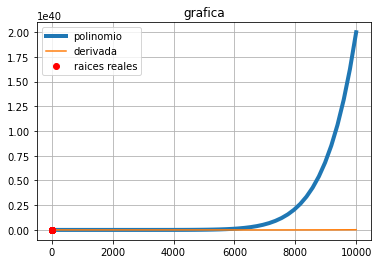

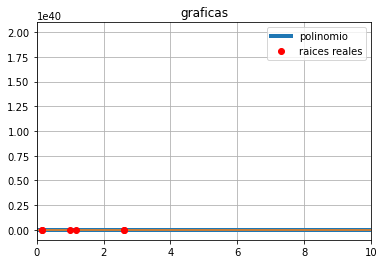

In [135]:
# Numeral c punto 3:
# Primero generemos nuestro numero entero.
import random
a=print(random.randint(0, 390073)) # Numero aleatorio entero entre 0 y 390073.
b=random.seed(1035440236) # Generamos nuestra semilla.
random.randint(0,390073 )
c=df.loc[165321,'solution']
print(c)
p = np.poly1d(c)
print(p)
roots=p.roots
reales=roots.real
print("las raices reales son",reales)
derivada=p.deriv()
print(derivada)
# Procedemos a realizar el grafico:
x=np.linspace(0,10000)
plt.plot(x,p(x),lw=4,label="polinomio")
plt.plot(x,derivada(x),label="derivada")
plt.plot(reales,p(reales),"ro",label="raices reales")
plt.grid()
plt.legend()
plt.title("grafica")
plt.show()

### Veamos donde estan ubicadas las raices reales del polinomio: Nota es un polinomio con componente compleja.

x=np.linspace(0,10000)
plt.plot(x,p(x),lw=4,label="polinomio")
plt.plot(x,derivada(x))
plt.plot(reales,p(reales),"ro",label="raices reales")
plt.xlim(0,10)
plt.title("graficas")
plt.grid()
plt.legend()











In [224]:
print(random.uniform(0,1)) # Numero aleatorio.

0.017493688451023726


0.10872322653353117
3
0.9253639801515291


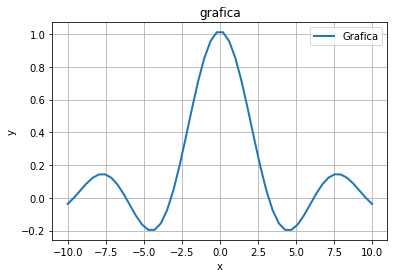

las raices son x=-9.593399854441818 x=9.593399854441818 
las otras raices son x=-3.1975589659107326 x=3.1975589659107326 


Text(0.5, 1.0, 'Funcion')

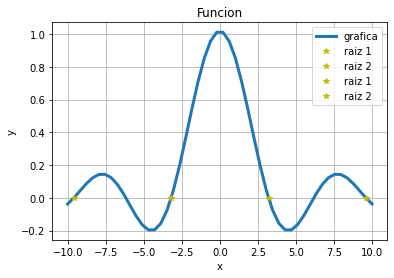

In [231]:
# Generemos una semilla 2.
print(random.uniform(0,1))

b=random.seed(1035440236) # Generamos nuestra semilla.
print(random.randint(1,5 ))
# Tenemos la tercera:
# Aqui tenemos la tercera.
# Veamos el polinomio.
print(random.uniform(0,1))

#sin/x = 0.9253639801515291
def f(x):
  return ((np.sin(x))/x)+0.017493688451023726
x=np.linspace(-10,10)  
plt.plot( x, f(x), lw=2,label="Grafica" ) # Visualizamos nuestra grafica.
plt.title("grafica")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid() # Hacemos un bosquejo de la grafica:
plt.show()
# Busquemos las soluciones: implementos algunos metodos para encontrar los ceros de la funcion.
root1=optimize.newton(f,-9)
root2 = optimize.newton(f,9)
print("las raices son x={} x={} ".format(root1,root2)) # Aqui tenemos nuestras soluciones.
root3= optimize.newton(f,-2.5)
root4= optimize.newton(f,2.5)
print("las otras raices son x={} x={} ".format(root3,root4))


x=np.linspace(-10,10)  
plt.plot( x, f(x), lw=3,label="grafica" ) # Visualizamos nuestra grafica.
plt.plot(root1,f(root1),'y*',label="raiz 1")
plt.plot(root2,f(root2),'y*',label="raiz 2")
plt.plot(root3,f(root3),'y*',label="raiz 1")
plt.plot(root4,f(root4),'y*',label="raiz 2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.title("Funcion")








